<a href="https://colab.research.google.com/github/nargo0o/Image-processing/blob/main/4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python==4.4.0.42

     |████████████████████████████████| 49.4MB 81kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300

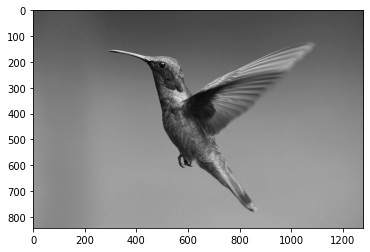

In [3]:
img = cv2.imread('4.1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

Выполните дискретное преобразование Фурье. Определите компоненту полученного преобразования, находящуюся на пересечении 563 строки и 563 столбца.

In [49]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(843, 1280)


In [50]:
f = np.fft.fft2(img)
print(f[563, 563])

(2712.435882469858+4089.877447344104j)


In [51]:
fshift = np.fft.fftshift(f)
print(fshift[421][640] == f[0][0])

True


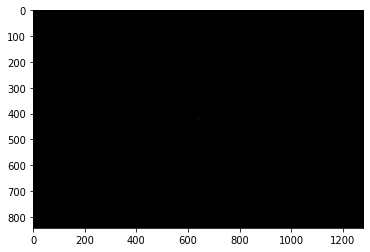

In [52]:
magnitude_spectrum = np.abs(fshift)
plt.imshow(magnitude_spectrum, cmap = 'gray')

In [53]:
print('min:', np.min(magnitude_spectrum), 'max:', np.max(magnitude_spectrum))
print(magnitude_spectrum[421][640])

min: 8.566366487013306 max: 133459721.99999997
133459721.99999997


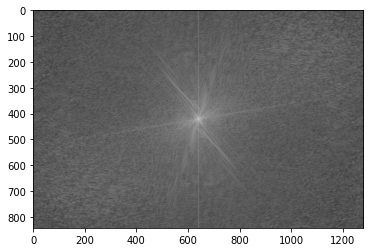

In [54]:
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

In [55]:
print('min:', np.min(magnitude_spectrum), 'max:', np.max(magnitude_spectrum))
print(np.max(magnitude_spectrum) - np.min(magnitude_spectrum))


min: 2.258253455941062 max: 18.709310289909332
16.45105683396827


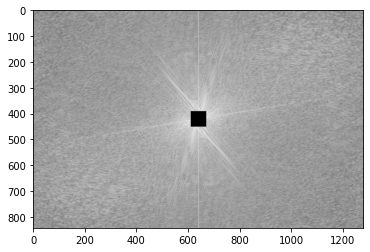

In [56]:
fshift[421 -  30 : 421 + 30, 640-30 : 640 + 30] = 0
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

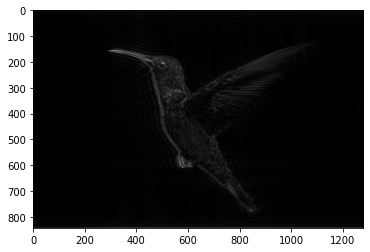

In [57]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

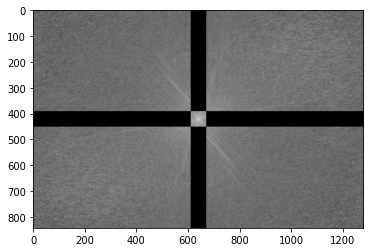

In [58]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fshift[421 - 30 : 421 + 30, 0 : 640 - 30] = fshift[421 - 30 : 421 + 30, 640+30 : 1280] = 0
fshift[0 : 421 - 30, 640 - 30 : 640 + 30] = fshift[421 + 30 : 843, 640 - 30 : 640 + 30] = 0
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

In [ ]:
print(f_ishift[624][399] == f[0][0])

In [59]:
print('min:', np.min(magnitude_spectrum), 'max:', np.max(magnitude_spectrum))
print(magnitude_spectrum[624][399])

min: 0.0 max: 18.709310289909332
8.135084907641138


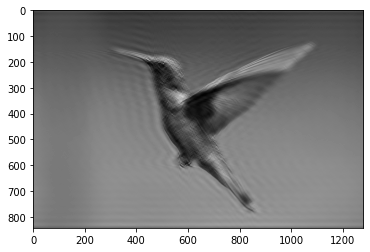

In [60]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')